In [1]:
#time-series practice

In [2]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


In [3]:
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/roop/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
data=pd.read_csv("AirPassengers.csv")

In [5]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
data.shape

(144, 2)

In [8]:
data.columns=['date','count_passenger']

In [9]:
data.head()

,date,count_passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
data.dtypes

date               object
count_passenger     int64
dtype: object

In [11]:
data.describe()

,count_passenger
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
data['date']=pd.to_datetime(data['date'])

In [13]:
data.head()

,date,count_passenger
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
data.dtypes

date               datetime64[ns]
count_passenger             int64
dtype: object

In [15]:
#getting month year and date from the data
data['month']=pd.DatetimeIndex(data['date']).month
data['year']=pd.DatetimeIndex(data['date']).year
data['day']=pd.DatetimeIndex(data['date']).day

In [16]:
data.head(10)

,date,count_passenger,month,year,day
0,1949-01-01,112,1,1949,1
1,1949-02-01,118,2,1949,1
2,1949-03-01,132,3,1949,1
3,1949-04-01,129,4,1949,1
4,1949-05-01,121,5,1949,1
5,1949-06-01,135,6,1949,1
6,1949-07-01,148,7,1949,1
7,1949-08-01,148,8,1949,1
8,1949-09-01,136,9,1949,1
9,1949-10-01,119,10,1949,1


In [17]:
data['month'].value_counts()

12    12
11    12
10    12
9     12
8     12
7     12
6     12
5     12
4     12
3     12
2     12
1     12
Name: month, dtype: int64

In [18]:
data['year'].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

In [19]:
data['day'].value_counts()

1    144
Name: day, dtype: int64

In [20]:
data.dtypes

date               datetime64[ns]
count_passenger             int64
month                       int64
year                        int64
day                         int64
dtype: object

In [21]:
data['month']=data['month'].astype('category')
data['year']=data['year'].astype('category')
data['day']=data['day'].astype('category')

In [22]:
data.head()

,date,count_passenger,month,year,day
0,1949-01-01,112,1,1949,1
1,1949-02-01,118,2,1949,1
2,1949-03-01,132,3,1949,1
3,1949-04-01,129,4,1949,1
4,1949-05-01,121,5,1949,1


In [23]:
data.dtypes

date               datetime64[ns]
count_passenger             int64
month                    category
year                     category
day                      category
dtype: object

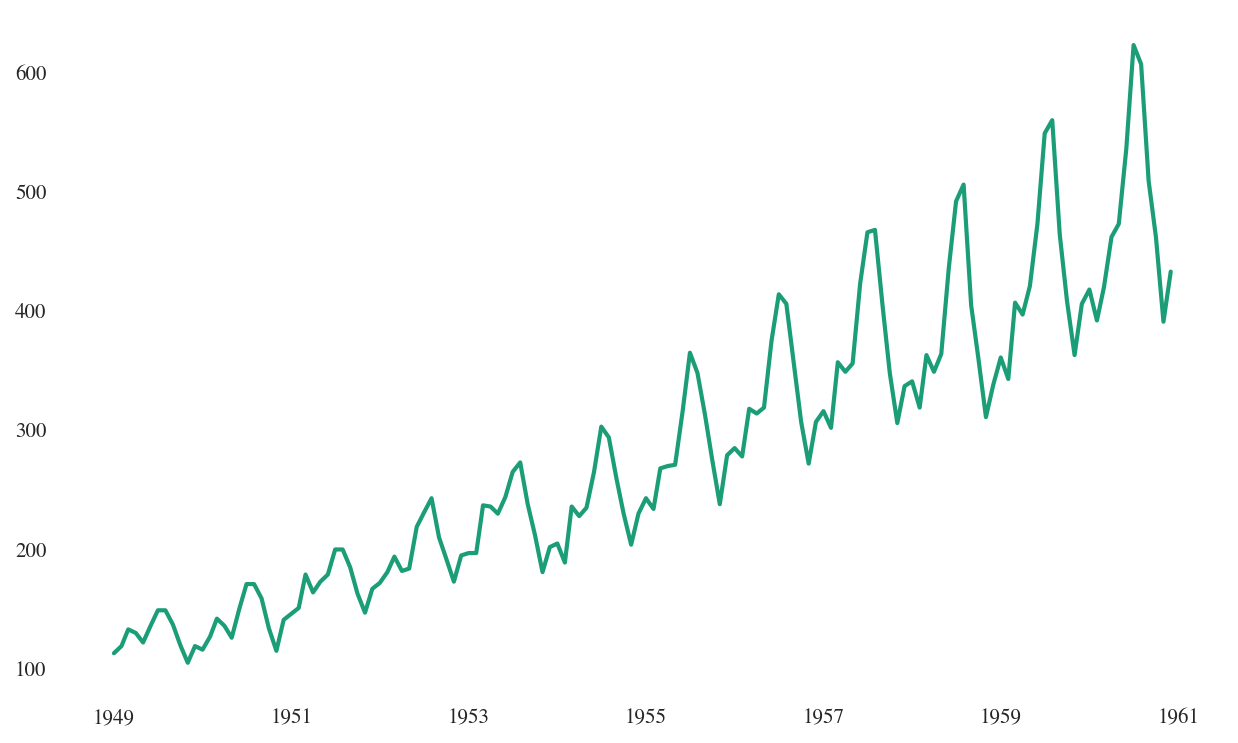

In [24]:
#plotting count_passenger with date
plt.plot(data[['date']],data[['count_passenger']])
plt.show()
#seasonality and increaing trend

In [25]:
#checking the time series stationary- plotting rolling stats, dickey fuller test
#dickey fuller test - null hypothesis states that TS is non stationary


In [26]:
n=data.shape[0]
data['mean_till']=0
suma=0
for i in range(n):
    suma=suma+data.ix[i,'count_passenger']
    data.ix[i,'mean_till']=suma/(i+1)

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [27]:
data['mean_till'].head()

0    112
1    115
2    120
3    122
4    122
Name: mean_till, dtype: int64

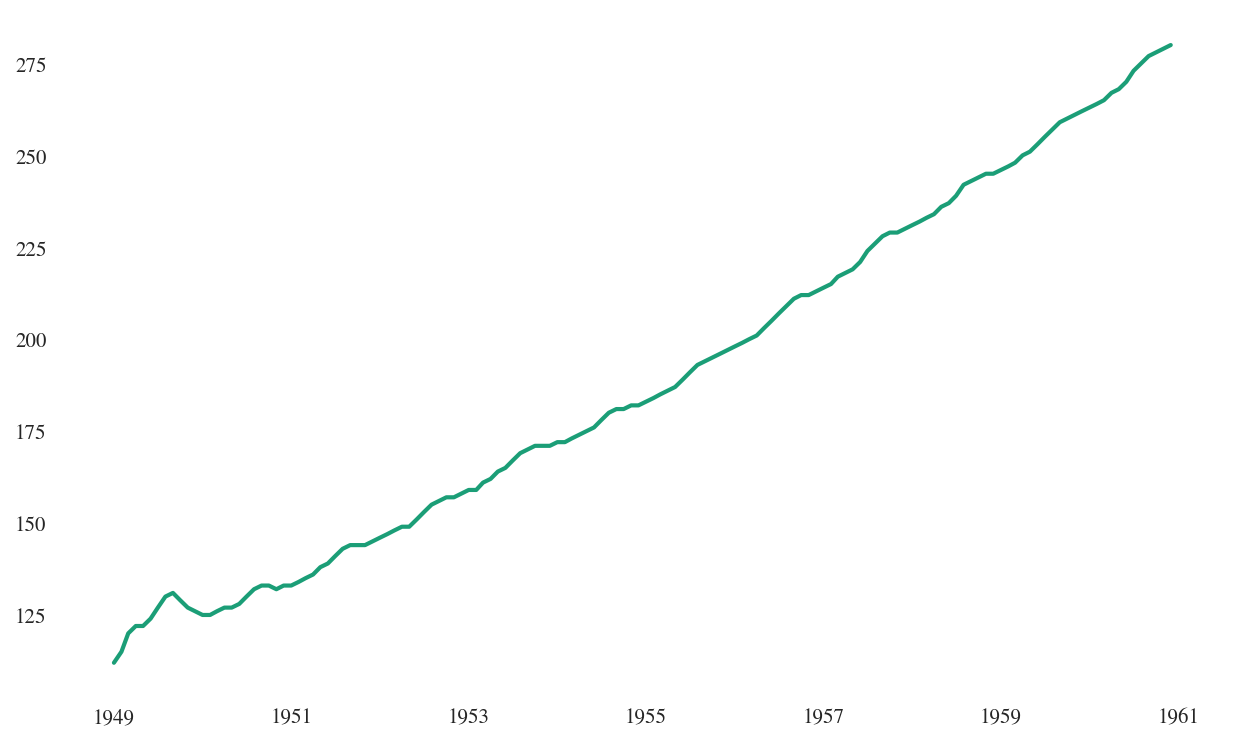

In [28]:
#moving average
plt.plot(data[['date']],data[['mean_till']])
plt.show()
#increasing average

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #rolling stats
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #plot rolling stats
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #dickey fuller test
    try:
        print 'Results of Dickey-Fuller Test:'
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print dfoutput
    except:
        print("svd not converging")

/home/roop/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


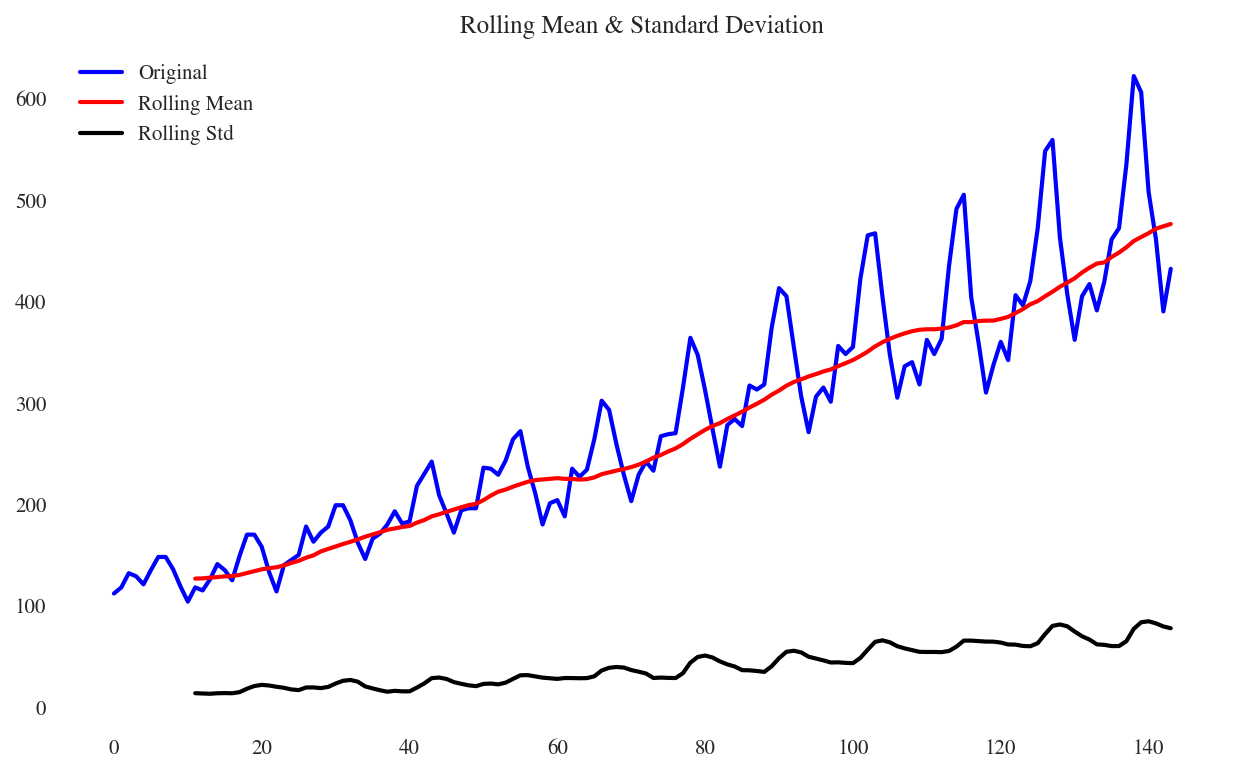

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [30]:
test_stationarity(data['count_passenger'])

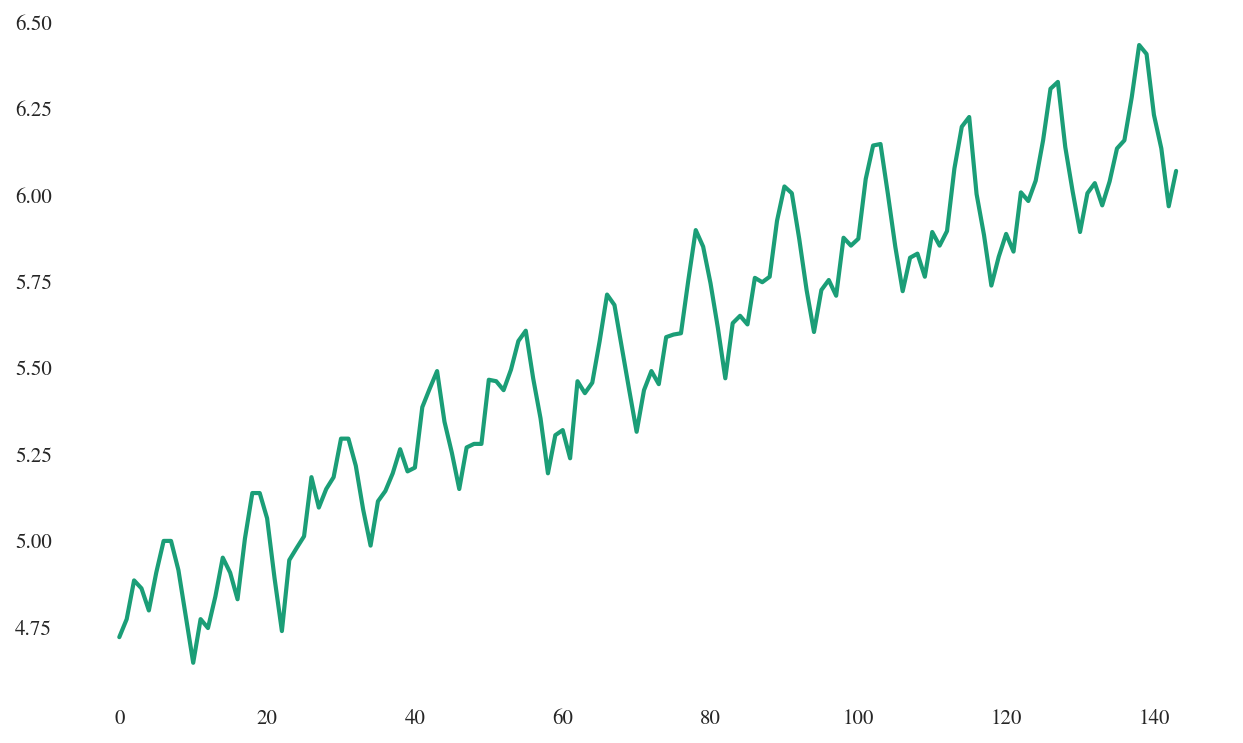

In [31]:
# making stationary - penalize the higher values (log,cube root,square root)
plt.plot(np.log(data['count_passenger']))
plt.show()

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


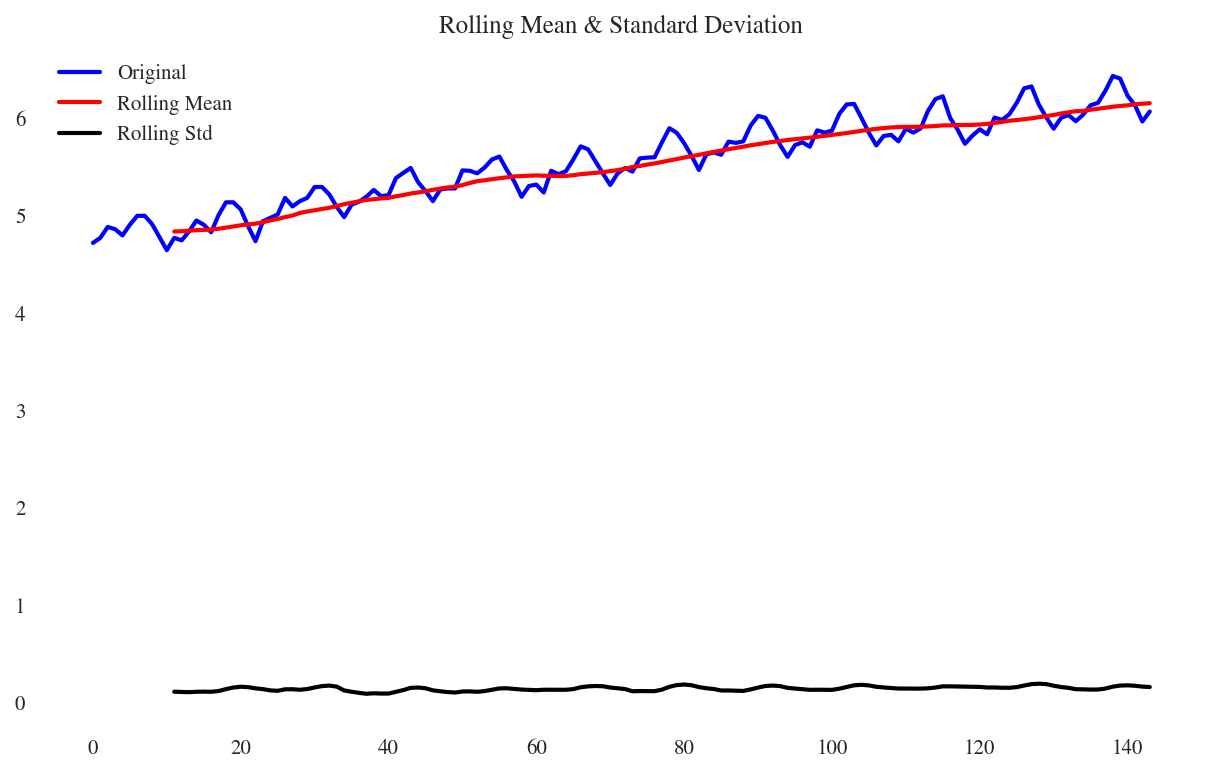

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [32]:
test_stationarity(np.log(data['count_passenger']))
#rolling variance became stationary

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


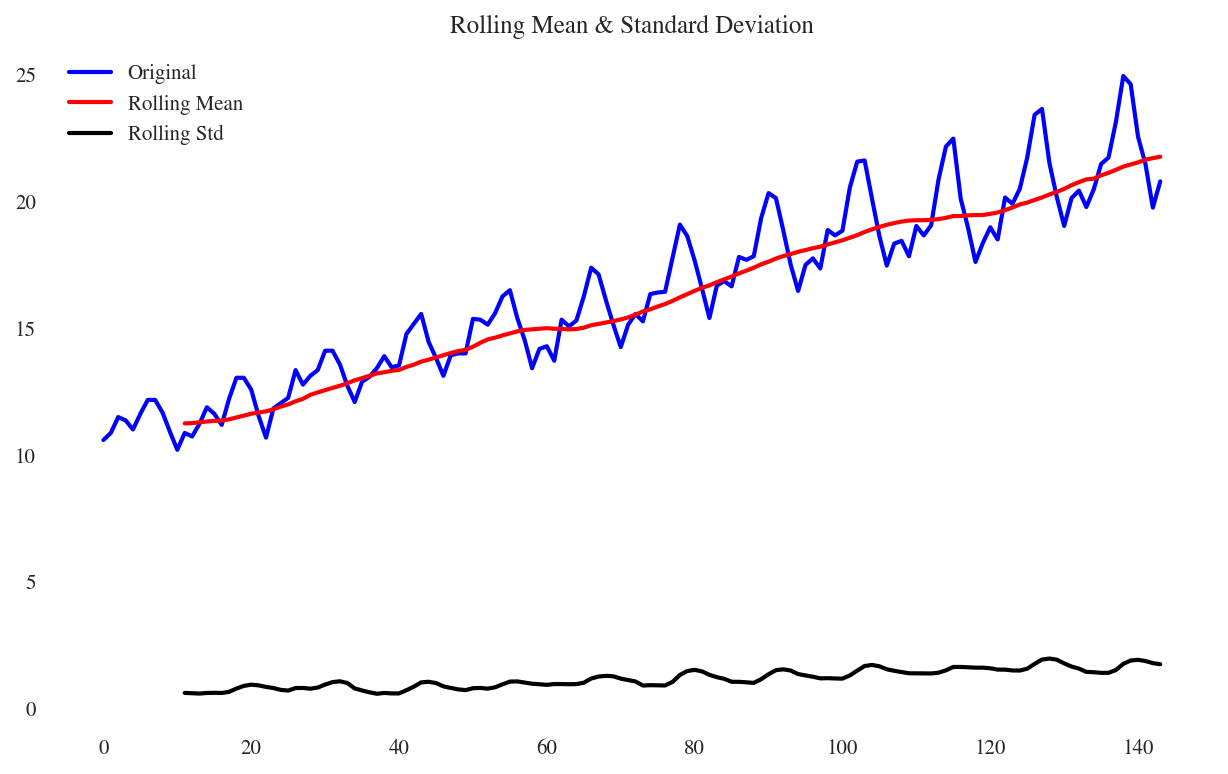

Results of Dickey-Fuller Test:
Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
test_stationarity(np.sqrt(data['count_passenger']))

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


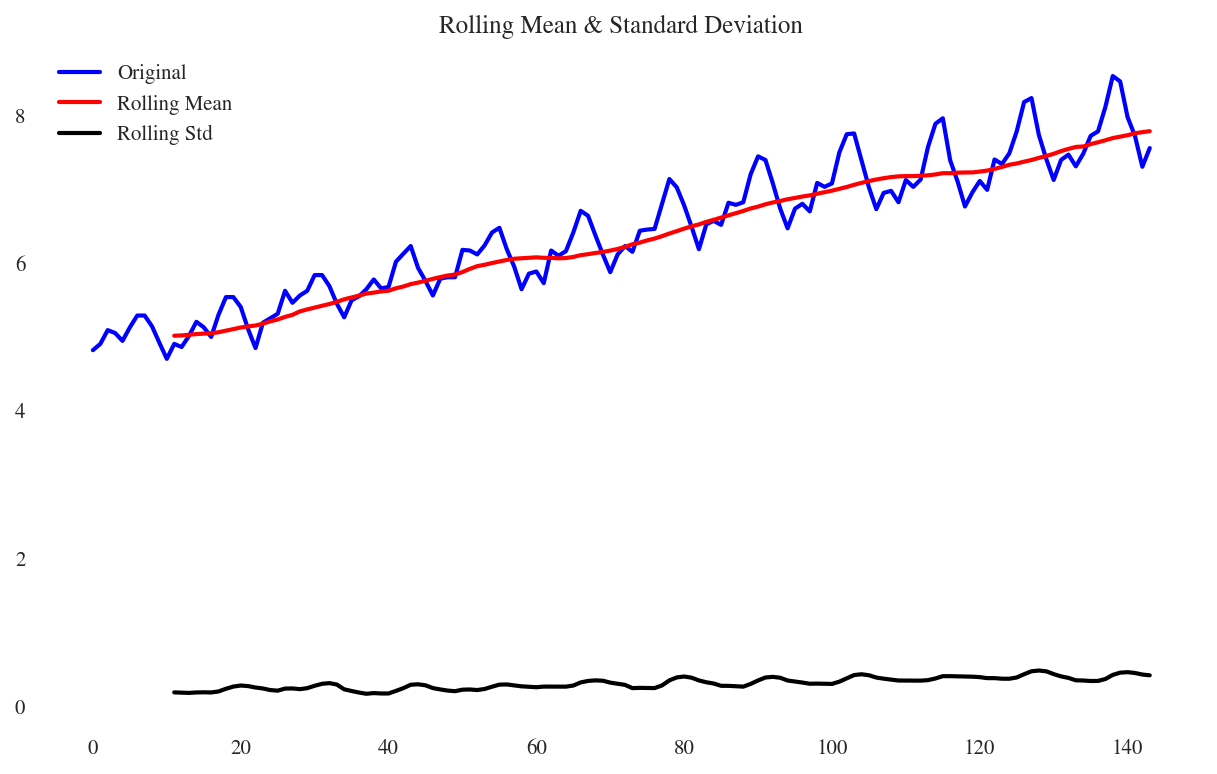

Results of Dickey-Fuller Test:
Test Statistic                  -0.810035
p-value                          0.816157
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
test_stationarity(np.cbrt(data['count_passenger']))

In [35]:
#log looks to be the best option


/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app


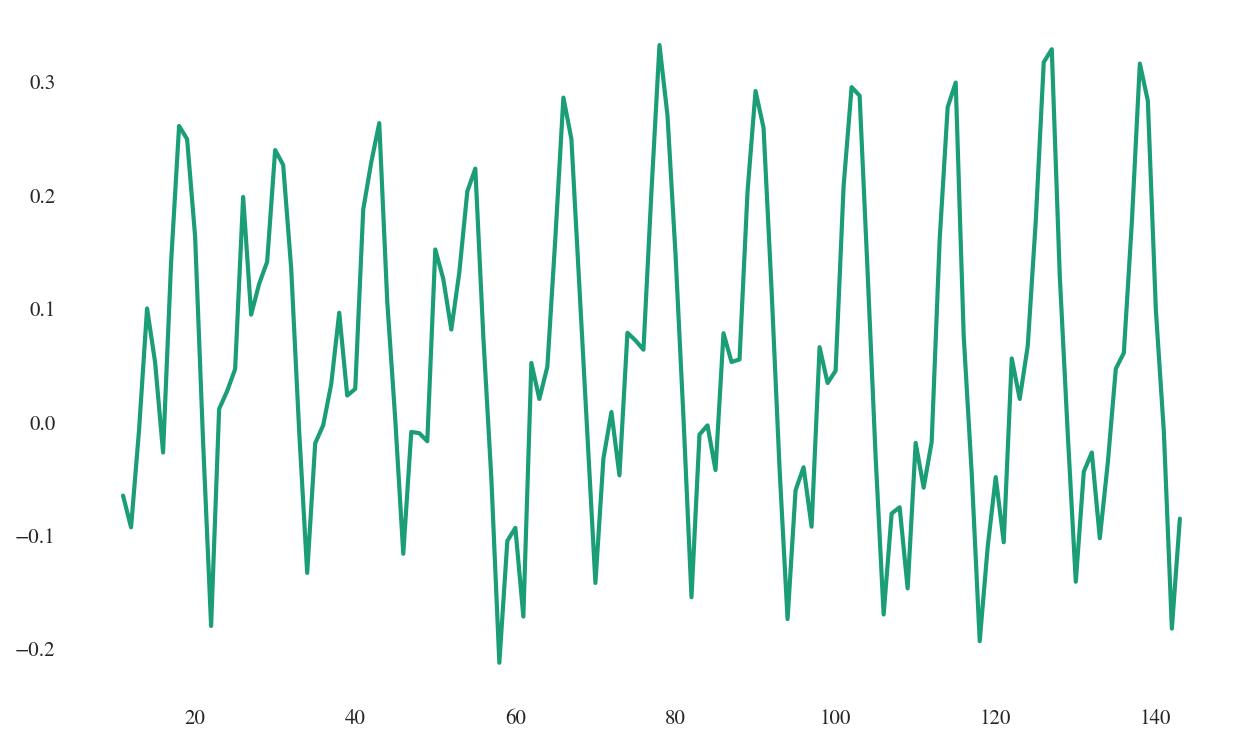

In [36]:
#plotting stationarity of time series
plt.plot(np.log(data['count_passenger'])-pd.rolling_mean(np.log(data['count_passenger']),12))
plt.show()

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


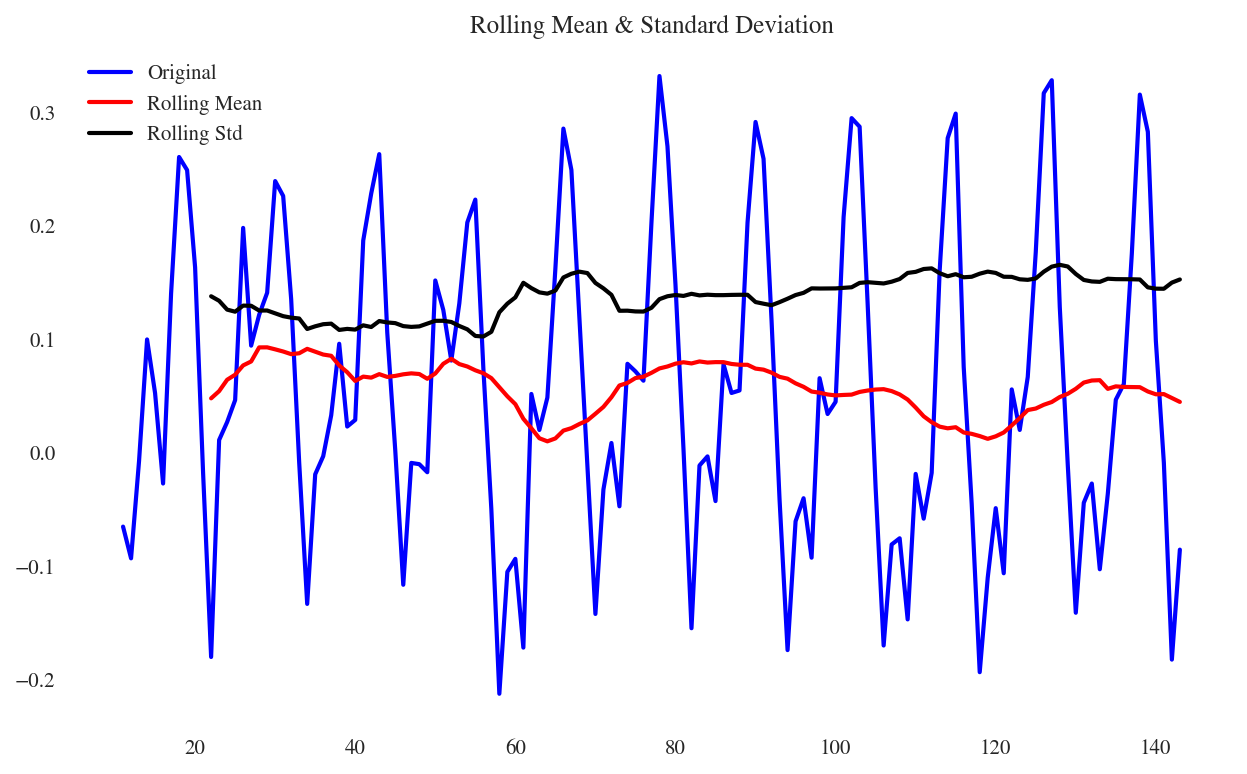

Results of Dickey-Fuller Test:
svd not converging


In [37]:
test_stationarity(np.log(data['count_passenger'])-pd.rolling_mean(np.log(data['count_passenger']),12))

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  app.launch_new_instance()


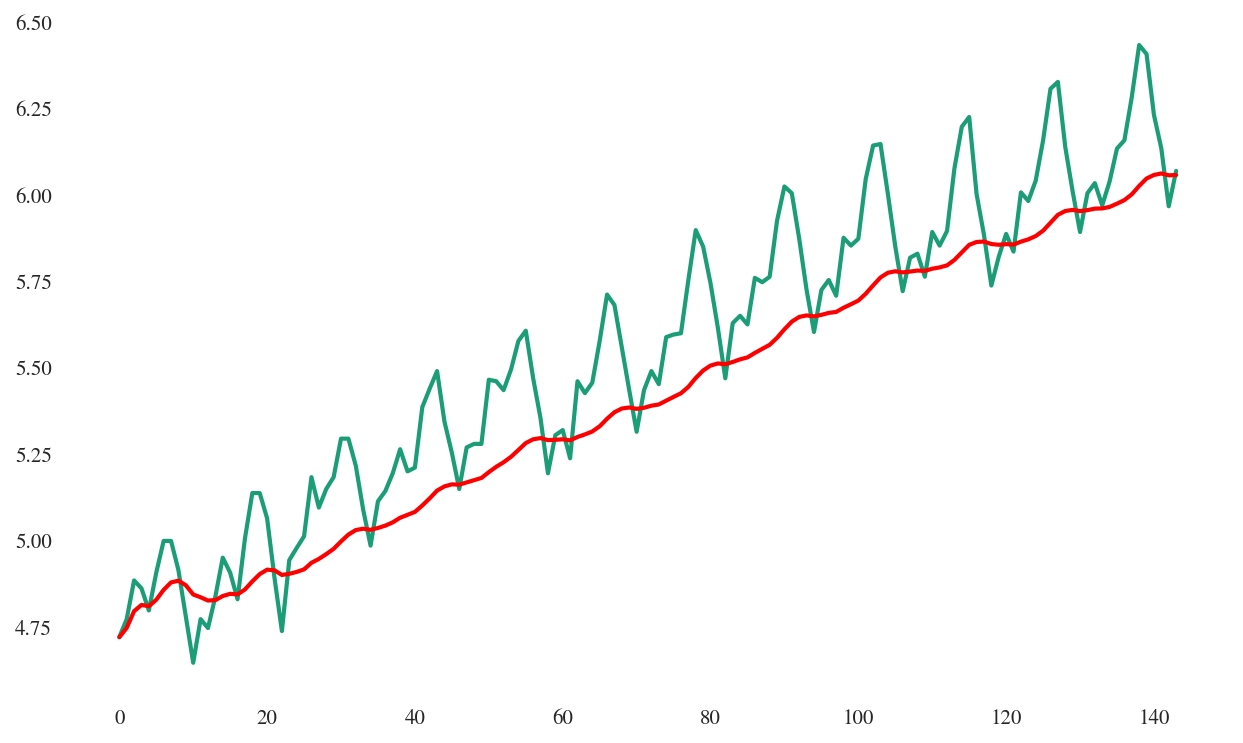

In [38]:
#taking exponential moving weighted average
data_log=np.log(data['count_passenger'])
expwghted_avg = pd.ewma(data_log, halflife=12)
plt.plot(data_log)
plt.plot(expwghted_avg, color='red')
plt.show()

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


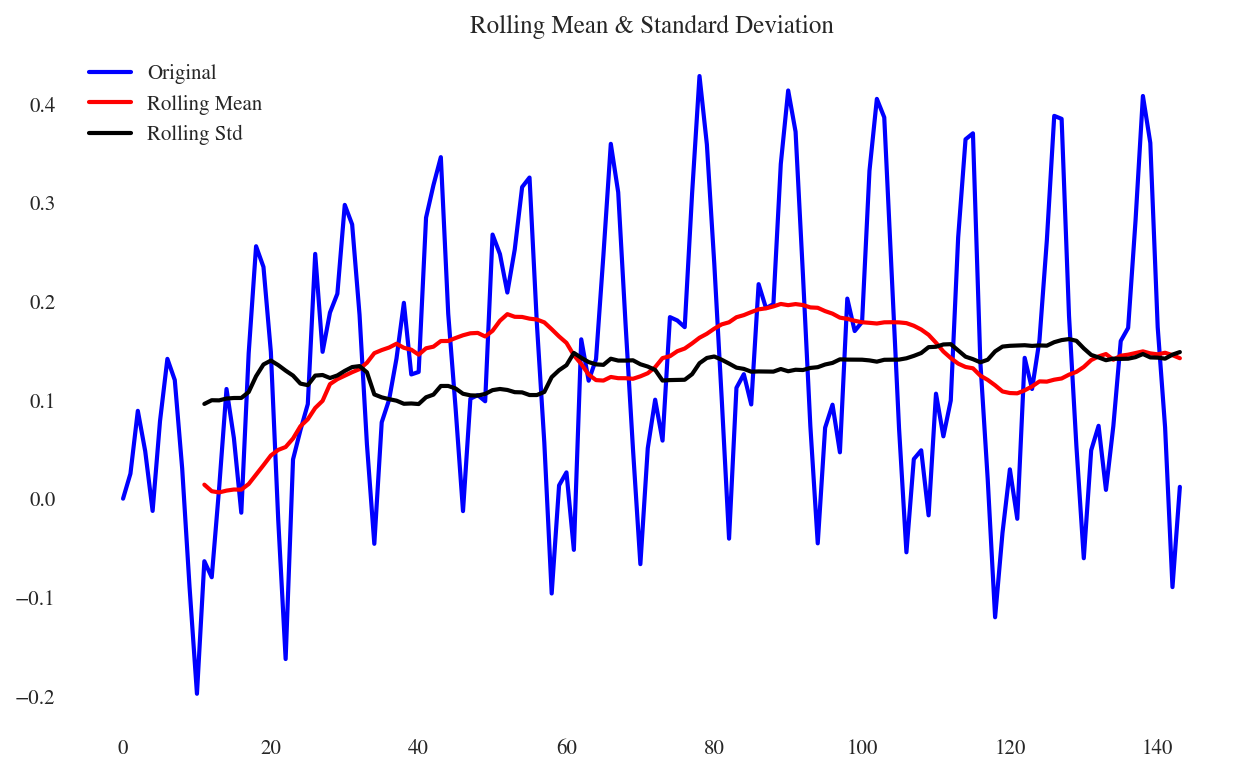

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
test_stationarity(data_log-expwghted_avg)

In [40]:
#tackling the high seasonality - differencing, decomposition


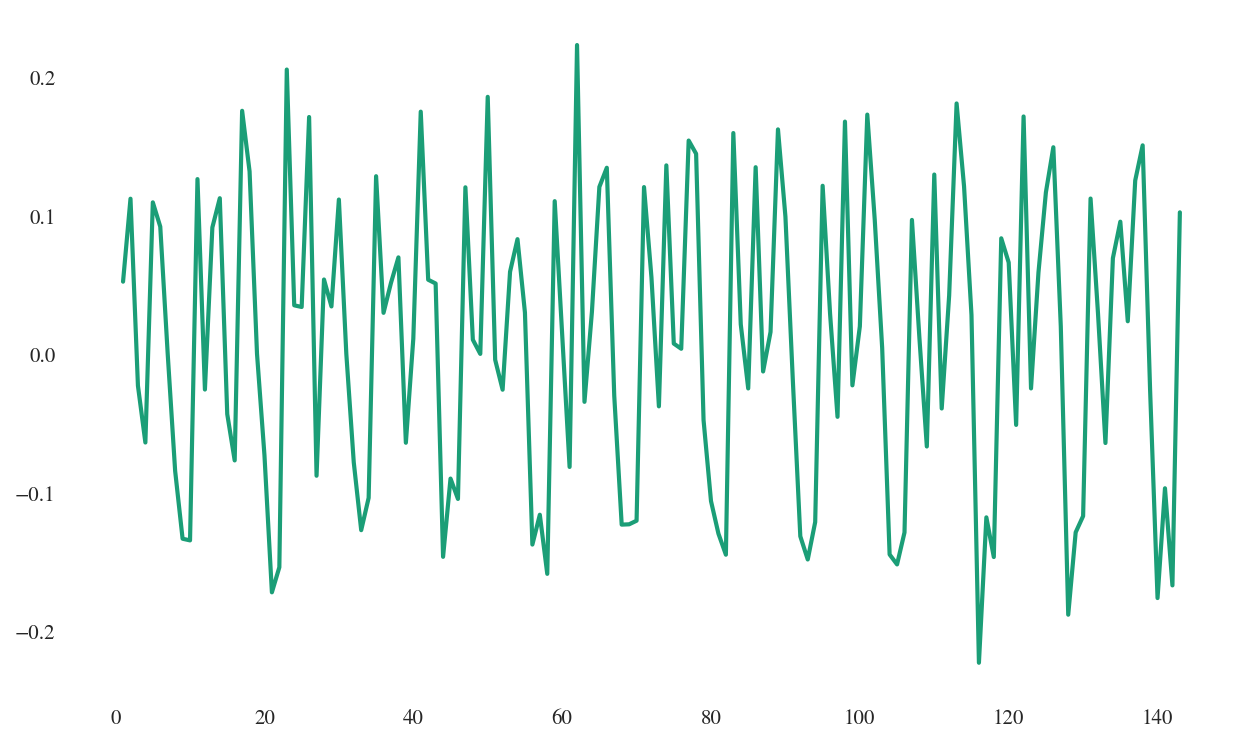

In [41]:
#differencing
plt.plot(data_log-data_log.shift())
plt.show()

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


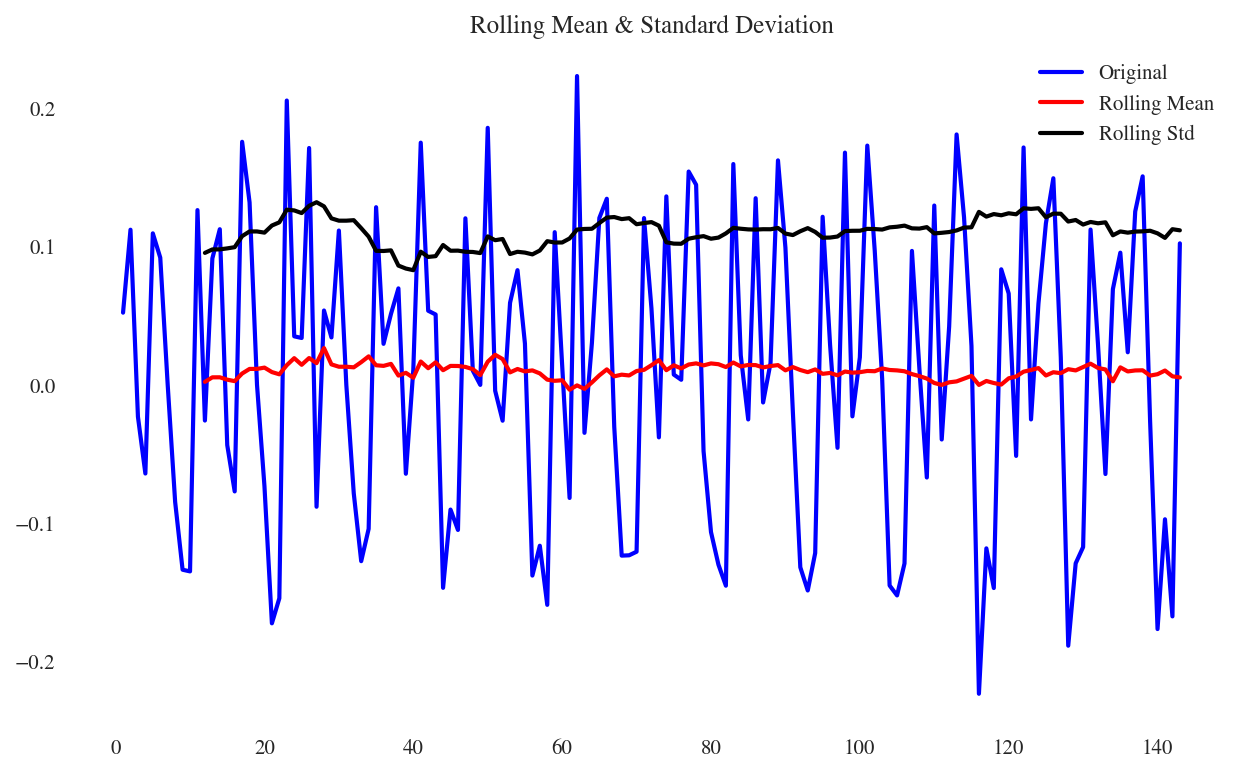

Results of Dickey-Fuller Test:
svd not converging


In [42]:
data_log_diff=(data_log-data_log.shift())
data_log.dropna(inplace=True)
test_stationarity(data_log_diff)

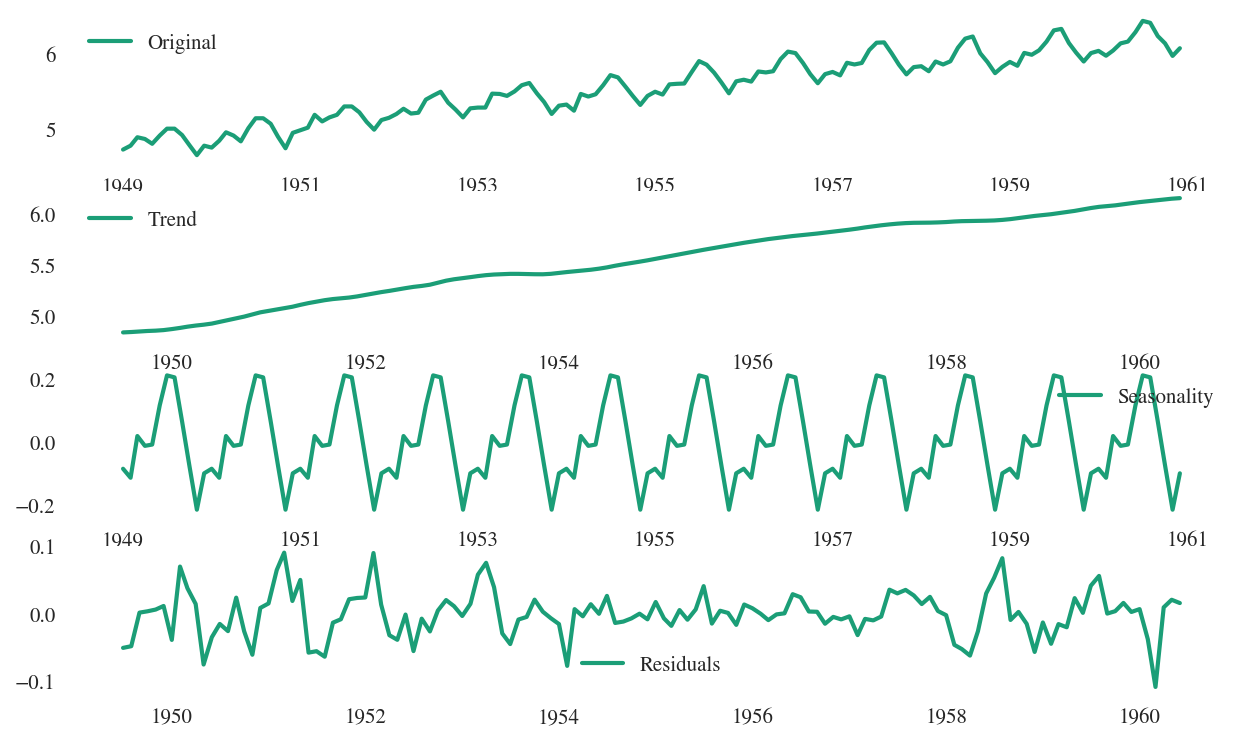

In [43]:
#decomposing - model trend and seasonality separately 
from statsmodels.tsa.seasonal import seasonal_decompose
data_log.index=data['date']
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')




/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


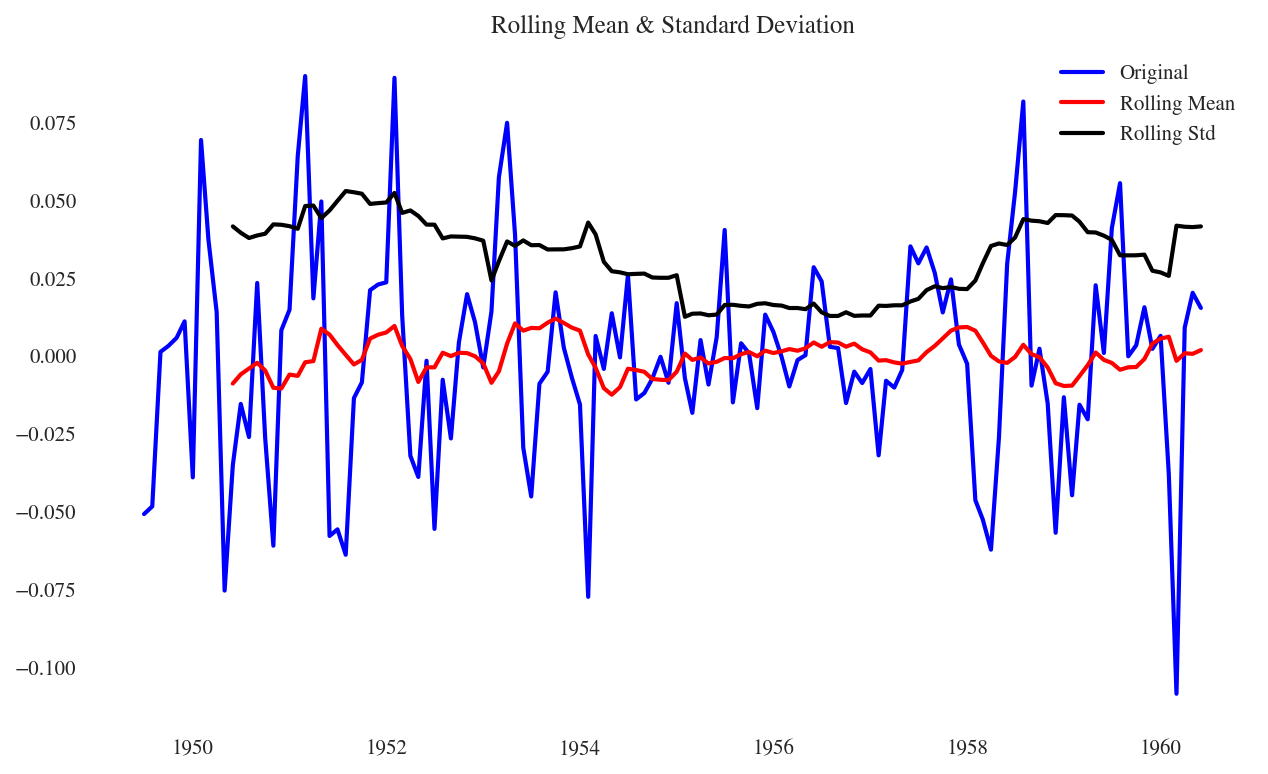

Results of Dickey-Fuller Test:
svd not converging


/home/roop/anaconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:1591: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


In [44]:
#residuals can be modeled and they will be helpful
test_stationarity(residual)

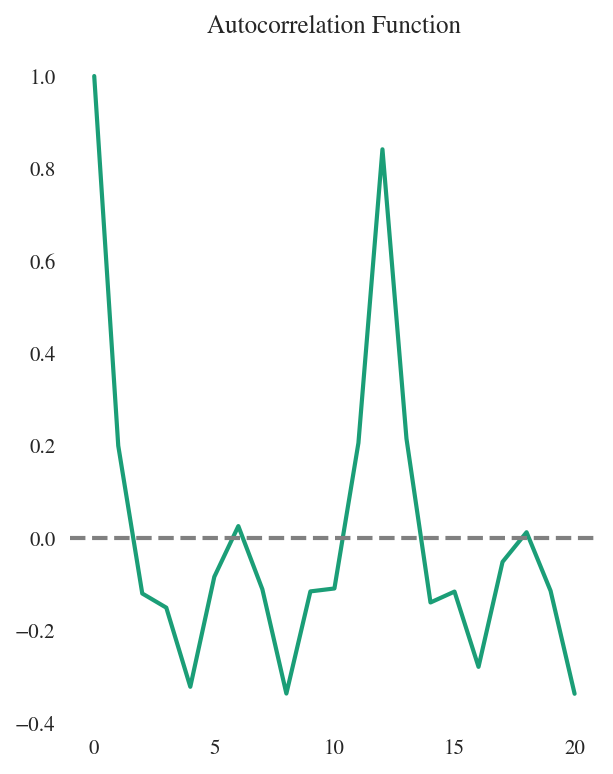

In [48]:
#forecasting time series
from statsmodels.tsa.stattools import acf, pacf
data_log_diff=data_log-data_log.shift()
data_log_diff.dropna(inplace=True)
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

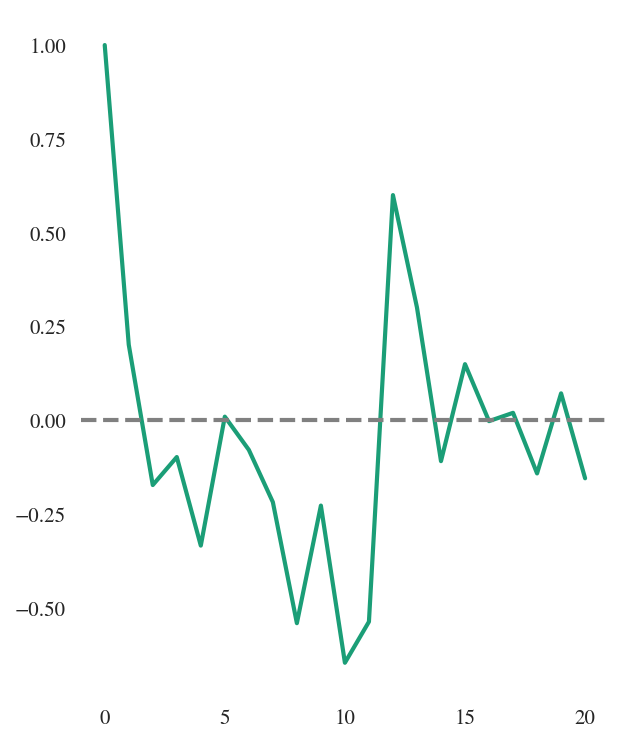

In [49]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')

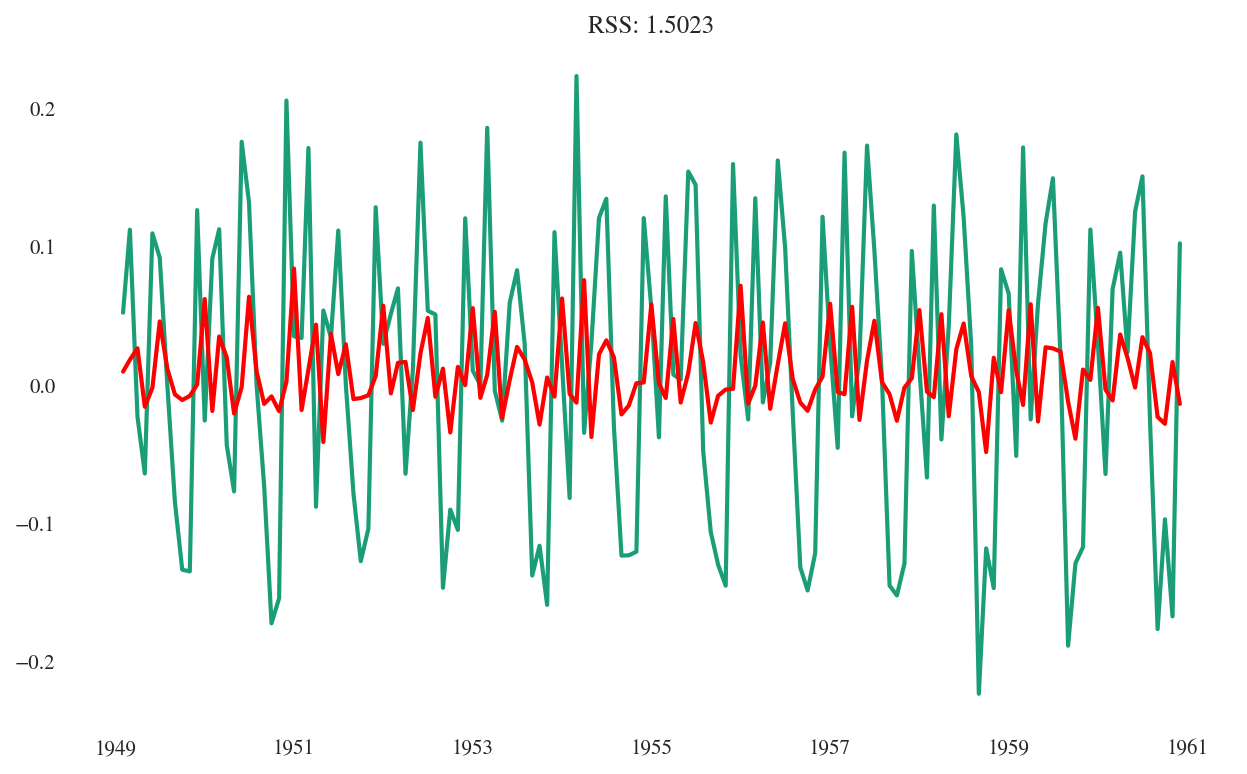

In [51]:
#only AR model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
#RSS is for residuals not the actual data
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2))
plt.show()

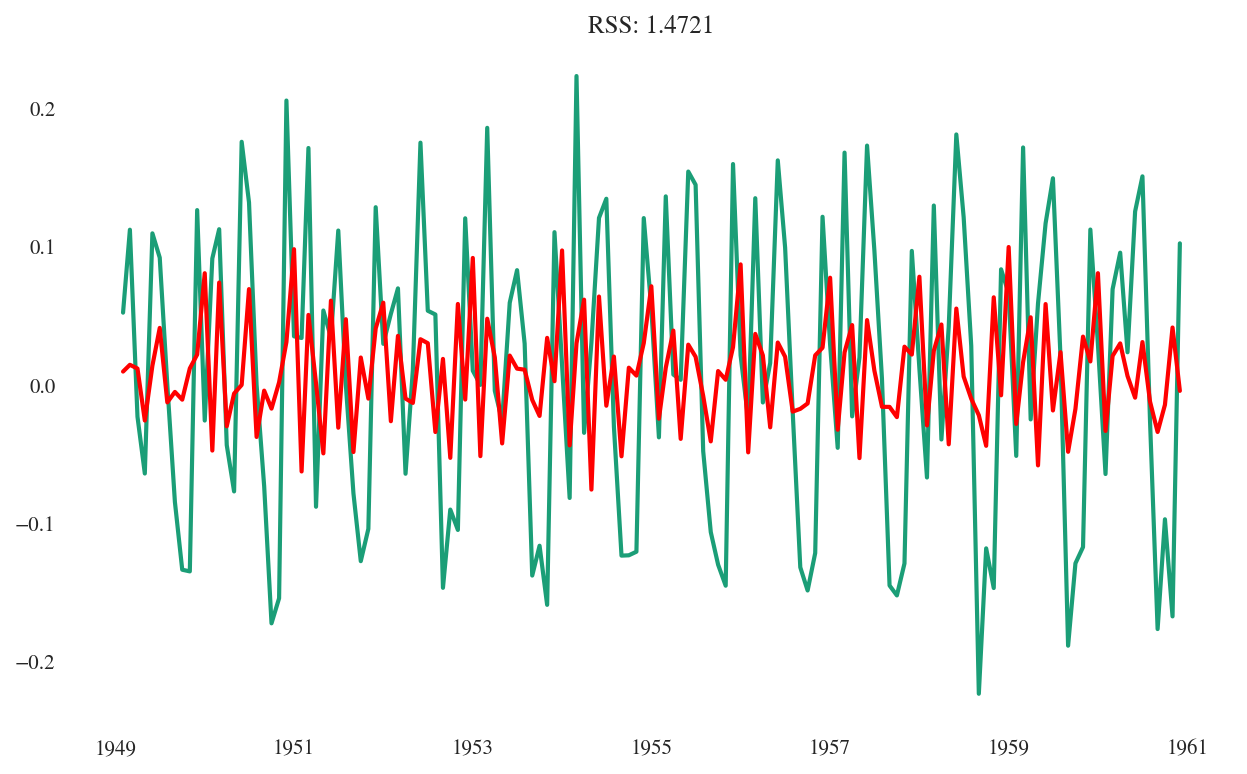

In [53]:
#only ma model
model = ARIMA(data_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data_log_diff)**2))
plt.show()

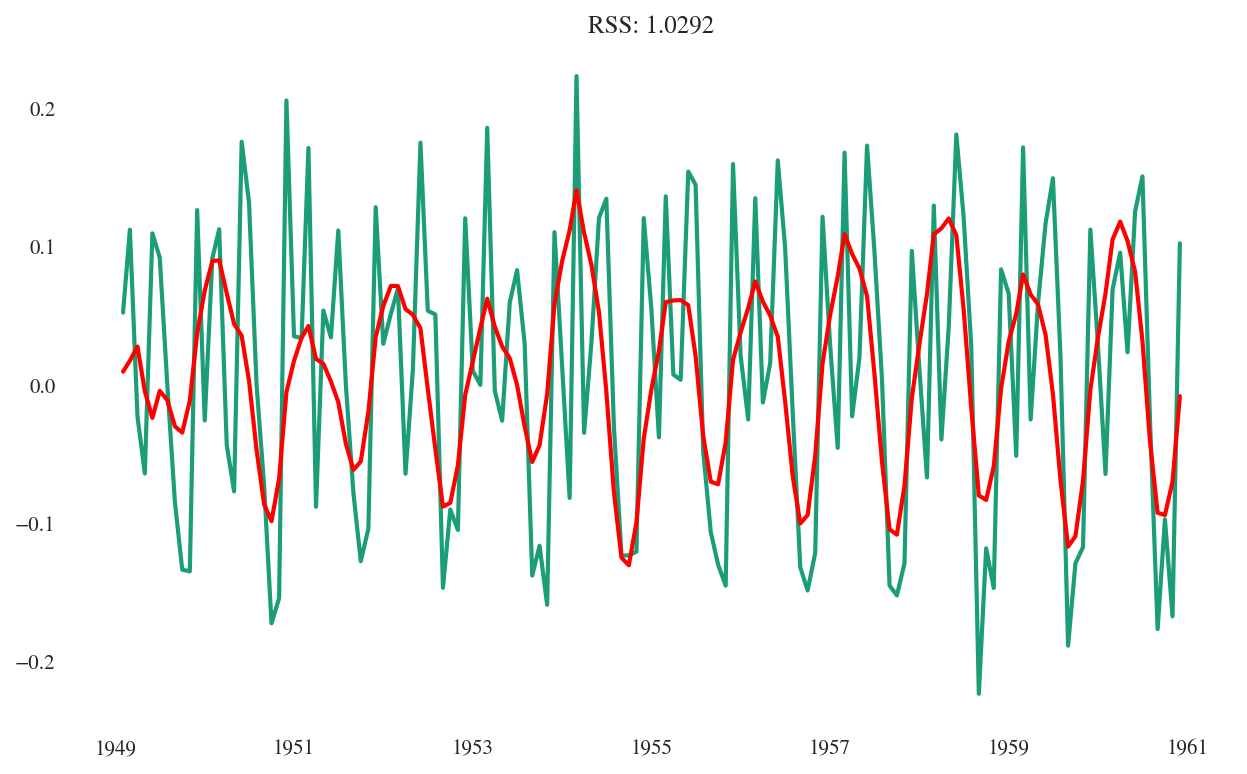

In [54]:
#combined model
model = ARIMA(data_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff)**2))
plt.show()

In [55]:
#scaling it back to the original
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [56]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [59]:
#adding base to cumsum
predictions_ARIMA_log = pd.Series(data_log.ix[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

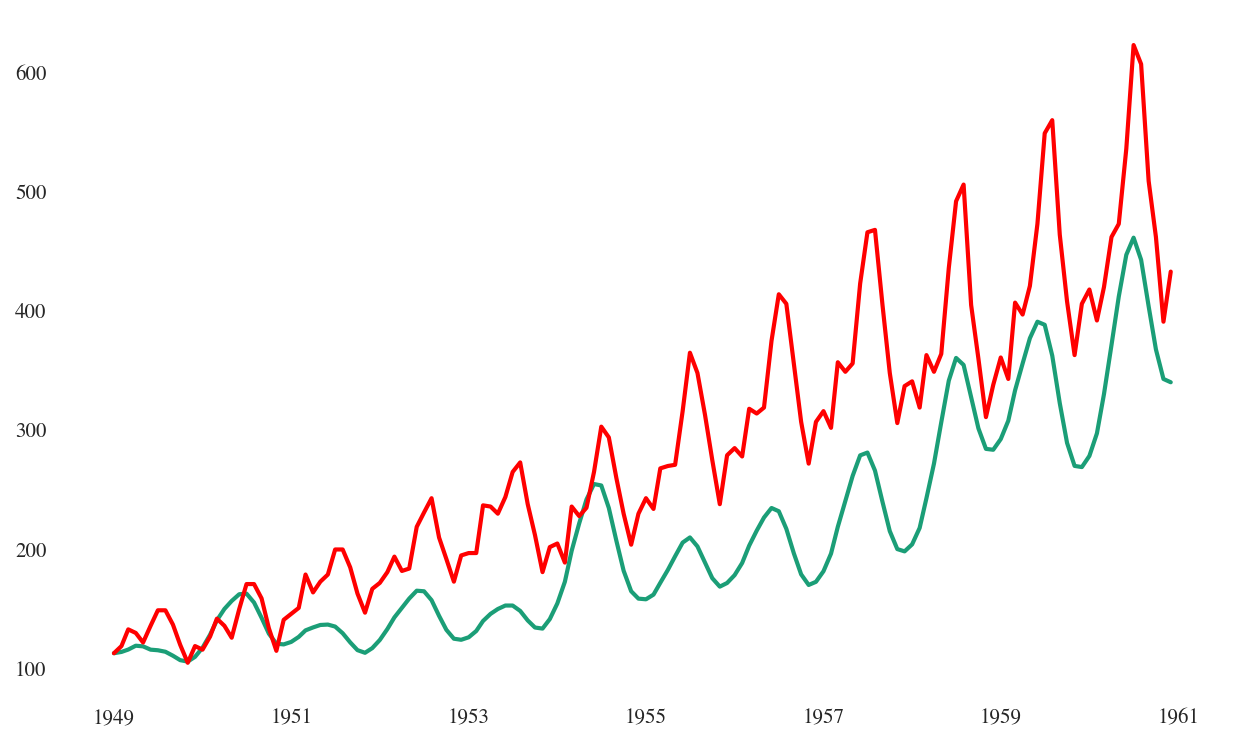

In [70]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA)
plt.plot(data['date'],data['count_passenger'],color="red")
plt.show()

In [73]:
#not a good forecast it sould be slightly above 
#can be improved by adding moving average to the prediction
rolmean=pd.rolling_mean(data['count_passenger'],window=12)

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()


In [77]:
type(rolmean)

pandas.core.series.Series

In [79]:
rolmean.index=data['date']

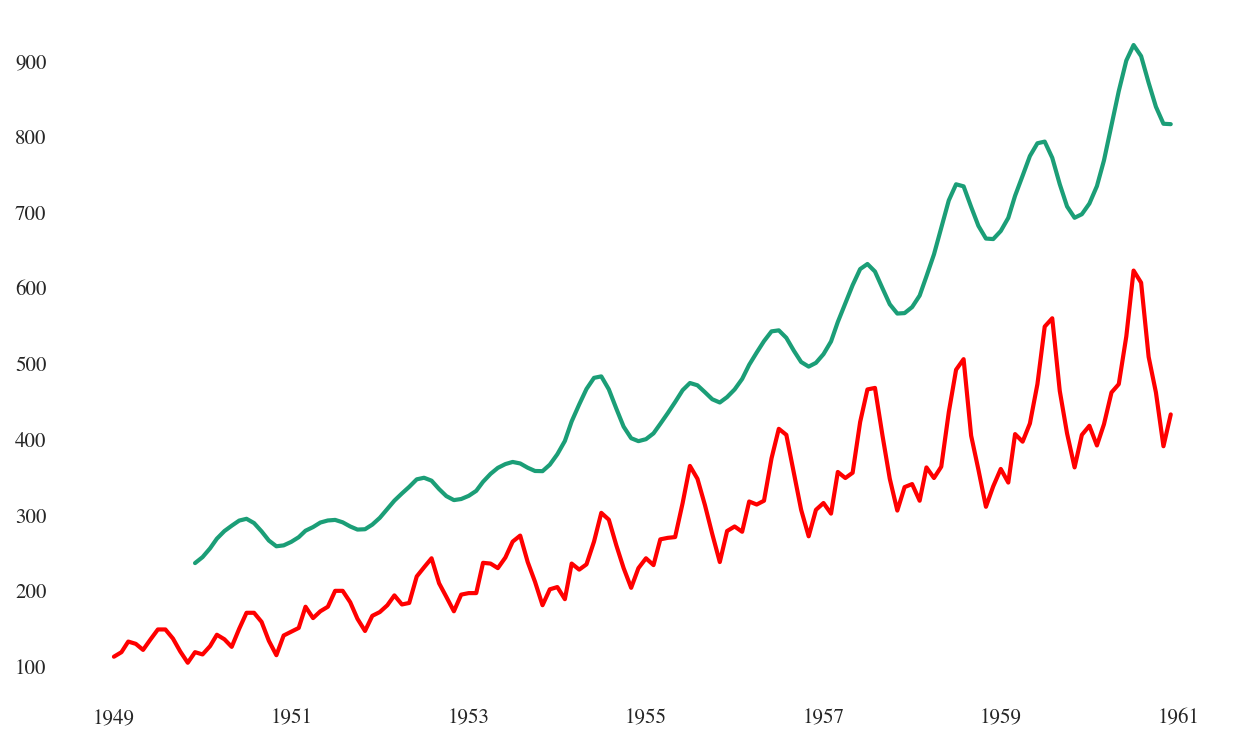

In [82]:
plt.plot(rolmean+predictions_ARIMA)
plt.plot(data['date'],data['count_passenger'],color="red")
plt.show()
#not working

In [83]:
#try adding the difference of rolmean of predicted and actual 
pred_rolmean=pd.rolling_mean(predictions_ARIMA,window=12)

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app


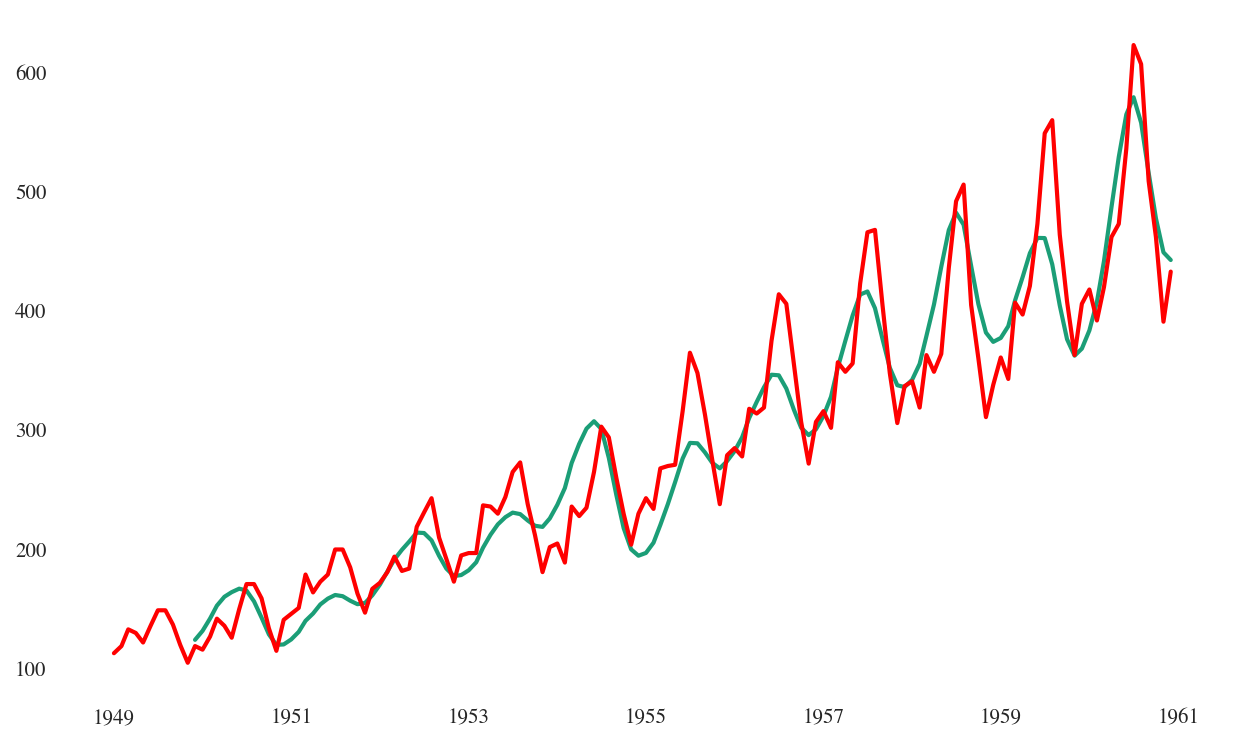

In [84]:
plt.plot(rolmean+predictions_ARIMA-pred_rolmean)
plt.plot(data['date'],data['count_passenger'],color="red")
plt.show()
#worked yeah!

In [85]:
#now it looks better
#the main purpose of analysis is to see how statsmodel.tsa makes it easy to build and analyse a time Series
#concepts of ARIMA